In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, recall_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from xgboost import XGBClassifier

In [35]:
%store -r data_scaled


In [47]:
data_scaled=data_scaled.sample(frac=0.1, replace=False, random_state=150)
X = data_scaled.drop(['target'],axis=1)
y = data_scaled.target

In [38]:
train, test, train_labels, test_labels = train_test_split(X, y, stratify=y ,test_size=0.3, random_state=150)

Recall:  0.09935337707084534
              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96    247418
         1.0       0.45      0.10      0.16     21187

    accuracy                           0.92    268605
   macro avg       0.69      0.54      0.56    268605
weighted avg       0.89      0.92      0.90    268605



{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

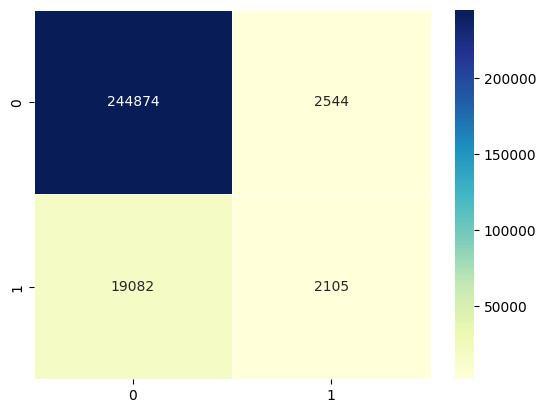

In [48]:
rforest = RandomForestClassifier(n_jobs=-1, max_features='sqrt')
rforest.fit(train, np.ravel(train_labels))
 
y_pred_rforest = rforest.predict(test)

cfm = metrics.confusion_matrix(test_labels, y_pred_rforest)
sns.heatmap(cfm, cmap='YlGnBu', annot=True, fmt='d', linewidths=.5);    
print('Recall: ',metrics.recall_score(test_labels, y_pred_rforest))
print(metrics.classification_report(test_labels, y_pred_rforest))

rforest.get_params()


In [40]:
knn = KNeighborsClassifier(n_jobs=-1,n_neighbors=5)
# knn.fit(train, np.ravel(train_labels))
 
# y_pred_knn = knn.predict(test)

# cfm = metrics.confusion_matrix(test_labels, y_pred_knn)
# sns.heatmap(cfm, cmap='YlGnBu', annot=True, fmt='d', linewidths=.5);    
# print('Recall: ',metrics.recall_score(test_labels, y_pred_knn))
# print('Report: ',metrics.classification_report(test_labels, y_pred_knn))
knn.get_params()



{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': -1,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [41]:
xgb.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': None,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

Recall:  0.02199461934204937
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96    247418
         1.0       0.68      0.02      0.04     21187

    accuracy                           0.92    268605
   macro avg       0.80      0.51      0.50    268605
weighted avg       0.90      0.92      0.89    268605



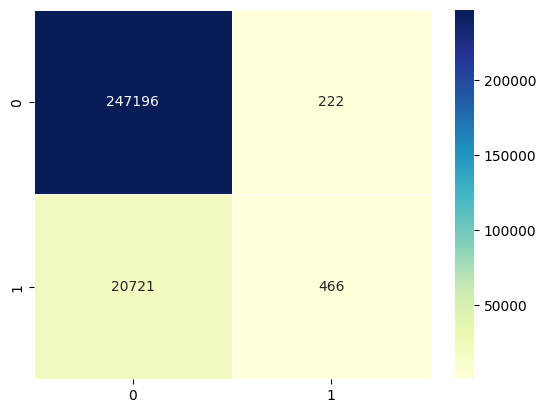

In [45]:
# Fit model to training data
xgb = XGBClassifier()
xgb.fit(train, train_labels)

y_pred_xgb = xgb.predict(test)


cfm = metrics.confusion_matrix(test_labels, y_pred_xgb)
sns.heatmap(cfm, cmap='YlGnBu', annot=True, fmt='d', linewidths=.5);    
print('Recall: ',metrics.recall_score(test_labels, y_pred_xgb))
print(metrics.classification_report(test_labels, y_pred_xgb))



Recall:  0.02858298776170729
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96    577310
         1.0       0.86      0.03      0.06     49435

    accuracy                           0.92    626745
   macro avg       0.89      0.51      0.51    626745
weighted avg       0.92      0.92      0.89    626745



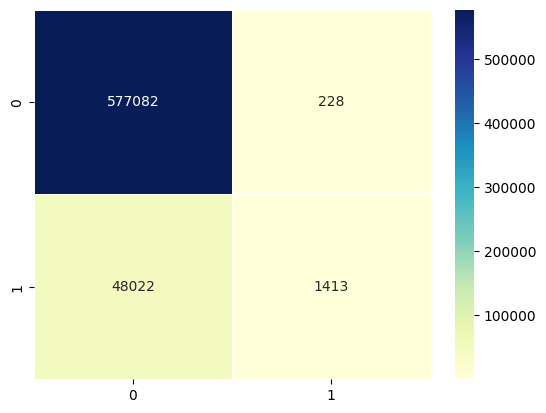

In [46]:
y_pred_xgb = xgb.predict(train)


cfm = metrics.confusion_matrix(train_labels, y_pred_xgb)
sns.heatmap(cfm, cmap='YlGnBu', annot=True, fmt='d', linewidths=.5);    
print('Recall: ',metrics.recall_score(train_labels, y_pred_xgb))
print(metrics.classification_report(train_labels, y_pred_xgb))

